In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Balaji Fast Food Sales.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB
None


In [19]:
print(df.head())

   order_id        date        item_name  item_type  item_price  quantity  \
0         1  07-03-2022         Aalopuri   Fastfood          20        13   
1         2   8/23/2022          Vadapav   Fastfood          20        15   
2         3  11/20/2022          Vadapav   Fastfood          20         1   
3         4  02-03-2023  Sugarcane juice  Beverages          25         6   
4         5  10-02-2022  Sugarcane juice  Beverages          25         8   

   transaction_amount transaction_type received_by time_of_sale  revenue  
0                 260              NaN         Mr.        Night      260  
1                 300             Cash         Mr.    Afternoon      300  
2                  20             Cash         Mr.    Afternoon       20  
3                 150           Online         Mr.        Night      150  
4                 200           Online         Mr.      Evening      200  


In [3]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool


In [4]:
df['revenue'] = df['item_price'] * df['quantity']
total_revenue = df['revenue'].sum()
print(f"Total Revenue: {total_revenue}")

Total Revenue: 275230


In [5]:
top_products = df.groupby('item_name')['quantity'].sum().sort_values(ascending=False)
print("Top Produk Berdasarkan Penjualan (Quantity):")
print(top_products)


Top Produk Berdasarkan Penjualan (Quantity):
item_name
Cold coffee        1361
Sugarcane juice    1278
Panipuri           1226
Frankie            1150
Sandwich           1097
Aalopuri           1044
Vadapav            1006
Name: quantity, dtype: int64


In [6]:
top_revenue = df.groupby('item_name')['revenue'].sum().sort_values(ascending=False)
print("Produk dengan Revenue Tertinggi:")
print(top_revenue)


Produk dengan Revenue Tertinggi:
item_name
Sandwich           65820
Frankie            57500
Cold coffee        54440
Sugarcane juice    31950
Panipuri           24520
Aalopuri           20880
Vadapav            20120
Name: revenue, dtype: int64


C:\Users\pc\AppData\Local\Temp\ipykernel_11064\2328926096.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=item_type_summary, x='item_type', y='revenue', palette='viridis')


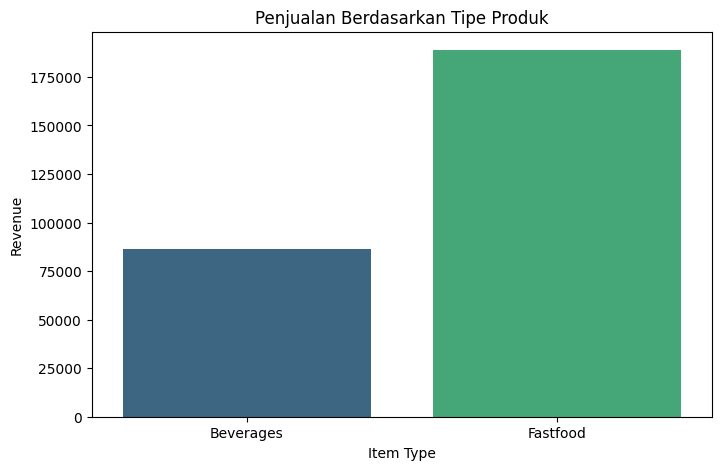

In [7]:
item_type_summary = df.groupby('item_type')['revenue'].sum().reset_index()

# Visualisasinya
plt.figure(figsize=(8,5))
sns.barplot(data=item_type_summary, x='item_type', y='revenue', palette='viridis')
plt.title('Pendapatan Berdasarkan Tipe Produk')
plt.xlabel('Item Type')
plt.ylabel('Revenue')
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_12488\3881998186.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=item_name_summary, y='item_name', x='revenue', palette='magma')


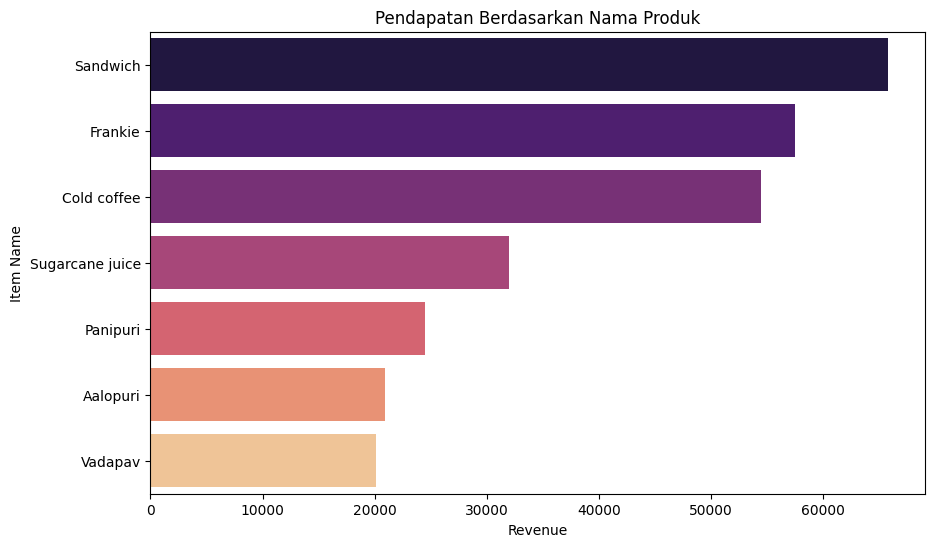

In [25]:
# --- 2. Pendapatan Berdasarkan Nama Produk ---
item_name_summary = df.groupby('item_name')['revenue'].sum().reset_index().sort_values(by='revenue', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=item_name_summary, y='item_name', x='revenue', palette='magma')
plt.title('Pendapatan Berdasarkan Nama Produk')
plt.xlabel('Revenue')
plt.ylabel('Item Name')
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_12488\3301205485.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=item_name_summary, y='item_name', x='quantity', palette='magma')


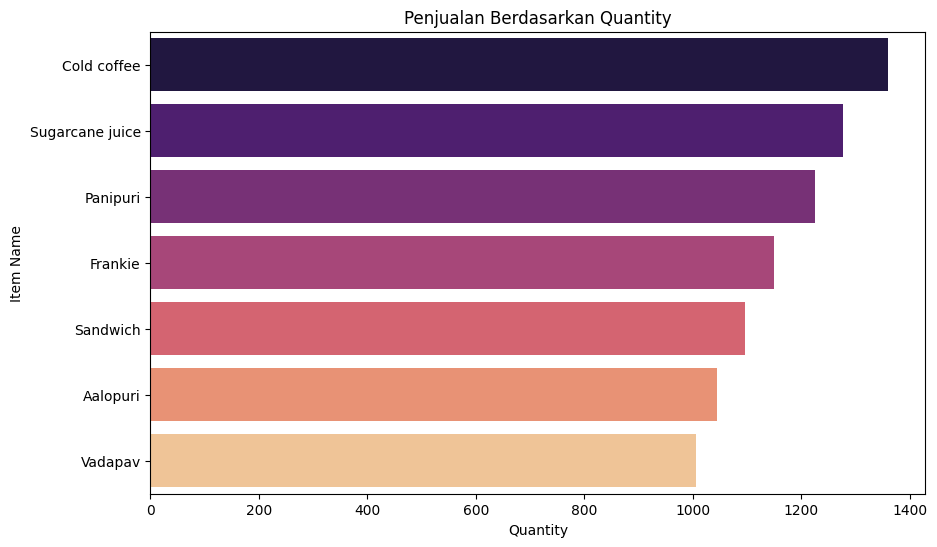

In [26]:
# --- 2. Penjualan berdasarkan Quantity ---
item_name_summary = df.groupby('item_name')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=item_name_summary, y='item_name', x='quantity', palette='magma')
plt.title('Penjualan Berdasarkan Quantity')
plt.xlabel('Quantity')
plt.ylabel('Item Name')
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_12488\3665419434.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tx_summary, x='transaction_type', y='count', palette='Set2')


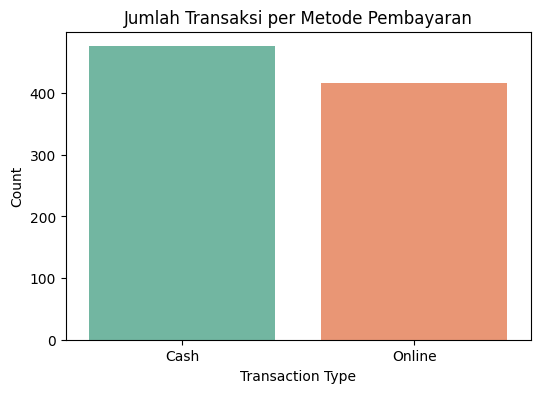

In [27]:
# --- 3. Jumlah Transaksi Berdasarkan Tipe Pembayaran ---
tx_summary = df['transaction_type'].value_counts().reset_index()
tx_summary.columns = ['transaction_type', 'count']

plt.figure(figsize=(6,4))
sns.barplot(data=tx_summary, x='transaction_type', y='count', palette='Set2')
plt.title('Jumlah Transaksi per Metode Pembayaran')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_12488\971241168.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=time_summary, x='time_of_sale', y='count', palette='coolwarm')


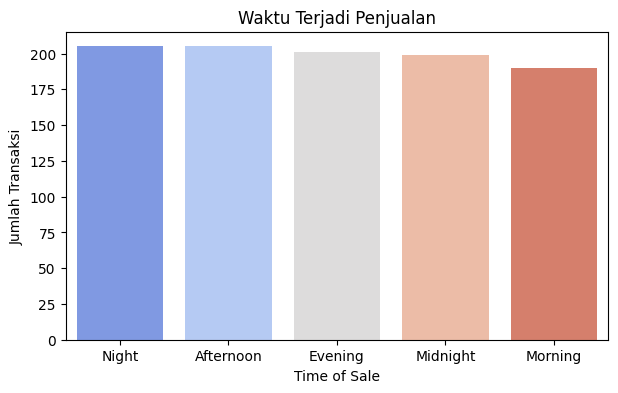

In [28]:

# --- 4. Waktu Terjadinya Penjualan Terbanyak ---
time_summary = df['time_of_sale'].value_counts().reset_index()
time_summary.columns = ['time_of_sale', 'count']

plt.figure(figsize=(7,4))
sns.barplot(data=time_summary, x='time_of_sale', y='count', palette='coolwarm')
plt.title('Waktu Terjadi Penjualan')
plt.xlabel('Time of Sale')
plt.ylabel('Jumlah Transaksi')
plt.show()

In [29]:
# Pastikan 'date' bertipe datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [30]:

# Buat kolom bulan dari kolom tanggal
df['month'] = df['date'].dt.to_period('M')

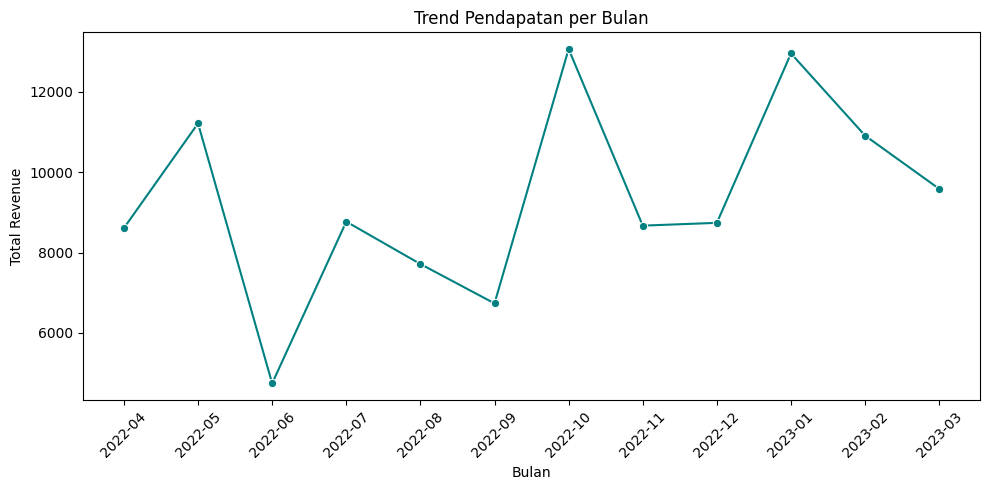

In [31]:
# --- 6. Trend Pendapatan per Bulan ---
df['month'] = df['date'].dt.to_period('M')
monthly_summary = df.groupby('month')['revenue'].sum().reset_index()
monthly_summary['month'] = monthly_summary['month'].astype(str)

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_summary, x='month', y='revenue', marker='o', color='teal')
plt.xticks(rotation=45)
plt.title('Trend Pendapatan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_12488\2823447488.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_summary, x='transaction_type', y='revenue', palette='pastel')


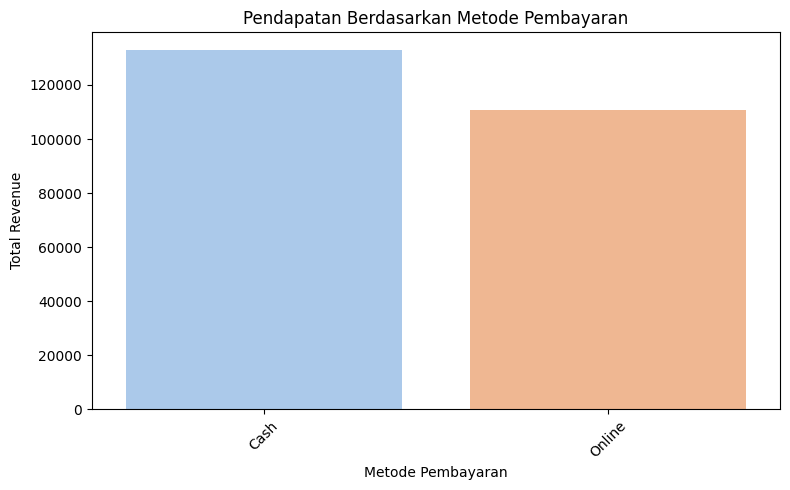

In [32]:
payment_summary = df.groupby('transaction_type')['revenue'].sum().reset_index().sort_values(by='revenue', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=payment_summary, x='transaction_type', y='revenue', palette='pastel')
plt.title('Pendapatan Berdasarkan Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
